# Epic 1 : Analyse des données

## Objectif
Comprendre la structure du dataset et préparer les données pour le modèle.

## Tâches
1. Examiner la structure du dataset.
2. Détecter et traiter les valeurs manquantes et doublons.
3. Analyser la distribution de la variable cible.
4. Générer des WordClouds.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## 1. Chargement et Inspection des données

In [35]:
df = pd.read_csv('../data/raw/DataSet_Emails.csv')

df.head()

,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


In [37]:
print(f"Dimensions du dataset : {df.shape}")

Dimensions du dataset : (31716, 8)


## 2. Nettoyage des données (Valeurs manquantes et Doublons)

In [38]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64


In [39]:

# df = df.dropna(subset=['text_column_name'])
df = df.dropna()

In [40]:
# Vérification des doublons
doublons = df.duplicated().sum()
print(f"Nombre de doublons : {doublons}")

Nombre de doublons : 0


In [41]:
# Suppression des doublons
df = df.drop_duplicates()
print(f"Dimensions après suppression des doublons : {df.shape}")

Dimensions après suppression des doublons : (31148, 8)


## 3. Analyse de la distribution (Spam vs Ham)

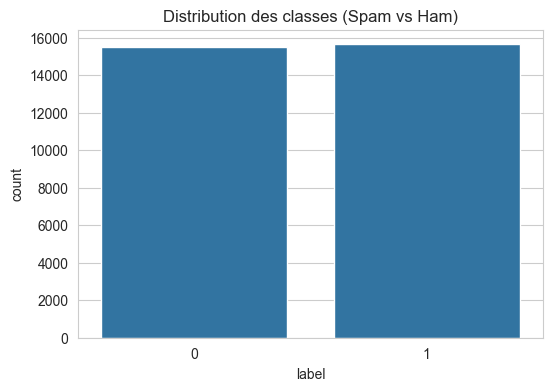

label
1    0.502279
0    0.497721
Name: proportion, dtype: float64


In [42]:
# Visualisation de la distribution
target_col = 'label'

plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title('Distribution des classes (Spam vs Ham)')
plt.show()

print(df[target_col].value_counts(normalize=True))

In [43]:
# les colonnes : 
print(df.columns)
df.head(2)

Index(['Unnamed: 0', 'message_id', 'text', 'label', 'label_text', 'subject',
       'message', 'date'],
      dtype='object')


,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19


## 4. WordClouds

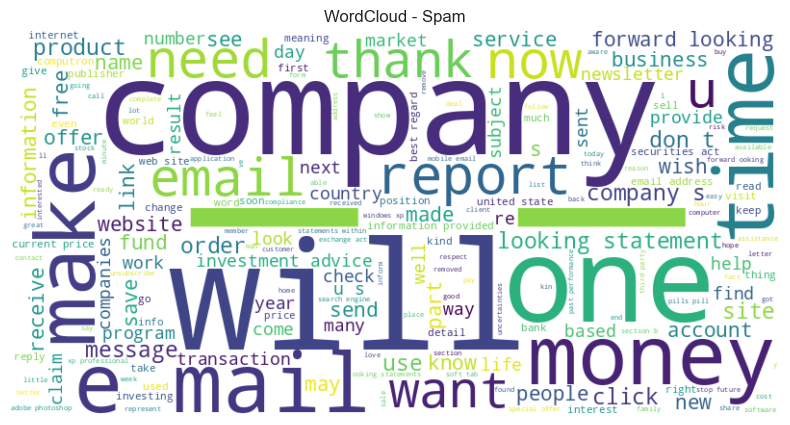

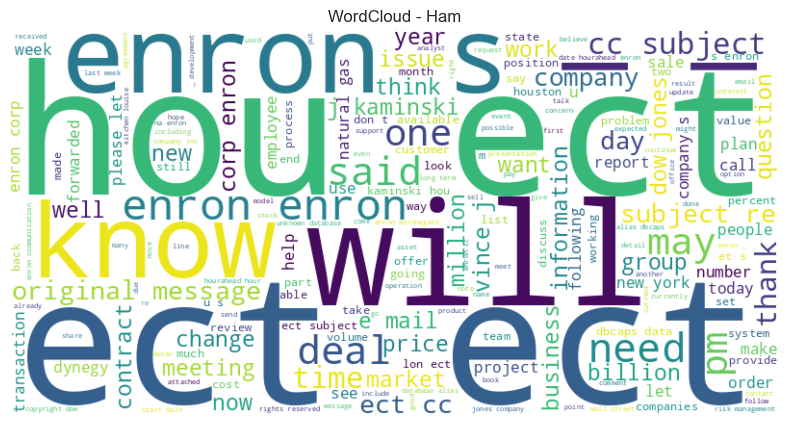

In [ ]:
# Fonction pour générer un WordCloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


spam_text = " ".join(df[df['label_text'] == 'spam']['text'].astype(str).tolist())
ham_text = " ".join(df[df['label_text'] == 'ham']['text'].astype(str).tolist())

# WordCloud Spam
plot_wordcloud(spam_text, "WordCloud - Spam")

# WordCloud Ham
plot_wordcloud(ham_text, "WordCloud - Ham")